In [ ]:
import pandas as pd
import numpy as np
PATH = "StudentPerformanceFactors.csv"

df = pd.read_csv(PATH)
print("Boyut:", df.shape)
df.head()
#Neden yapıyoruz ilk sütunda hata olup olmadığını görmek için

Boyut: (6607, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
print(df.dtypes) #kolonlar ve tipler
missing = df.isna().sum().sort_values(ascending=False)
print("\nEksik değer sayıları:\n", missing[missing > 0]) #eksik değerler
print("\nDuplicate satır sayısı:", df.duplicated().sum()) #tekrar eden satır kontrolü yapıyoruz
num_cols = df.select_dtypes(include="number").columns
display(df[num_cols].describe().T) #sayısal kolonların özet istatistiği


Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

Eksik değer sayıları:
 Parental_Education_Level    90
Teacher_Quality             78
Distance_from_Home          67
dtype: int64

Duplicate satır sayısı: 0


,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [ ]:
df = df.copy()

df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(r"[^\w]+", "_", regex=True)   # boşluk/özel karakter -> _
      .str.replace(r"_+", "_", regex=True)
      .str.strip("_")
)

df.columns
#kolon adları snake_case formatına dönüştürülmüştür
#kolon adlarını dönüştürme sebebi:veri üzerinde yapılan analizlerin hatalarını azaltmak ,okunabilirliğini artırmak,
#makine öğrenmesi sürecinde uyumluluğunu sağlamak için kolon isim değişikliği yapıldı


Index(['hours_studied', 'attendance', 'parental_involvement',
       'access_to_resources', 'extracurricular_activities', 'sleep_hours',
       'previous_scores', 'motivation_level', 'internet_access',
       'tutoring_sessions', 'family_income', 'teacher_quality', 'school_type',
       'peer_influence', 'physical_activity', 'learning_disabilities',
       'parental_education_level', 'distance_from_home', 'gender',
       'exam_score'],
      dtype='object')

In [ ]:
cat_cols = df.select_dtypes(include="object").columns

for c in cat_cols:
    df[c] = df[c].astype("string").str.strip()  # baştaki ve sondaki boşlukları temizle

df[cat_cols] = df[cat_cols].replace({"": pd.NA})  # boş stringleri eksik veri olarak tanımladık

# kontrol yapıyoruz
df[cat_cols].head()


,parental_involvement,access_to_resources,extracurricular_activities,motivation_level,internet_access,family_income,teacher_quality,school_type,peer_influence,learning_disabilities,parental_education_level,distance_from_home,gender
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female


In [ ]:
missing_cat = [c for c in cat_cols if df[c].isna().sum() > 0]
print("Eksik kategorik kolonlar:", missing_cat) #eksik olan kategorik kolonları bul
for c in missing_cat:
    mode_val = df[c].mode(dropna=True)
    fill_val = mode_val.iloc[0] if len(mode_val) else "Unknown"
    df[c] = df[c].fillna(fill_val)
df[missing_cat].isna().sum()
#Veri setinde eksik değerlerin yalnızca kategorik değişkenlerde bulunduğu tespit edilmiştir.
#mod kullanma sebebi:Çünkü bu değişkenler kategorik yapıdadır ve sayısal bir anlam taşımaz.
#ortalama ve medyan kategorik yapıya uygun değildir.
#Mod yöntemi ise veri setindeki en baskın kategoriyi koruyarak dağılımı en az bozan yöntemdir




Eksik kategorik kolonlar: ['teacher_quality', 'parental_education_level', 'distance_from_home']


,0
teacher_quality,0
parental_education_level,0
distance_from_home,0


In [ ]:
numeric_expected = [
    "hours_studied", "attendance", "sleep_hours", "previous_scores",
    "tutoring_sessions", "physical_activity", "exam_score"
]

for c in numeric_expected:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Eğer coercion yüzünden NA oluştuysa kontrol
print(df[numeric_expected].isna().sum().sort_values(ascending=False))
#CSV bazen sayıları string olarak okuyabilir; ileride grafik/modelleme de sorun çıkmaması için yaptık

hours_studied        0
attendance           0
sleep_hours          0
previous_scores      0
tutoring_sessions    0
physical_activity    0
exam_score           0
dtype: int64


In [ ]:
rules = {
    "attendance": (0, 100),
    "previous_scores": (0, 100),
    "exam_score": (0, 100),        # burada 101 gibi aykırı değer çıkabilir
    "sleep_hours": (0, 24),
    "hours_studied": (0, 80),
    "tutoring_sessions": (0, 50),
    "physical_activity": (0, 24),
}

violations = {}
for col, (lo, hi) in rules.items():
    mask = (df[col] < lo) | (df[col] > hi)
    cnt = int(mask.sum())
    if cnt > 0:
        violations[col] = cnt

violations
#1 satırda 101 değeri var bu aykırı değeri kırpacağız


{'exam_score': 1}

In [ ]:
# 0-100 aralığına kırp
df["exam_score"] = df["exam_score"].clip(0, 100)

# Kontrol
print("100 üstü kaldı mı?:", (df["exam_score"] > 100).sum())
print("0 altı kaldı mı?:", (df["exam_score"] < 0).sum())

100 üstü kaldı mı?: 0
0 altı kaldı mı?: 0


In [ ]:
ordered_maps = {
    "parental_involvement": ["Low", "Medium", "High"],
    "access_to_resources": ["Low", "Medium", "High"],
    "motivation_level": ["Low", "Medium", "High"],
    "family_income": ["Low", "Medium", "High"],
    "teacher_quality": ["Low", "Medium", "High"],
    "distance_from_home": ["Near", "Moderate", "Far"],
    "parental_education_level": ["High School", "College", "Postgraduate"],
}

for col, order in ordered_maps.items():
    # Eğer kolon mevcutsa ve değerler bekleniyorsa category'e çevir
    if col in df.columns:
        df[col] = pd.Categorical(df[col], categories=order, ordered=True)

# Diğer kategorikleri de category yap
other_cats = [c for c in cat_cols if c not in ordered_maps]
for c in other_cats:
    if c in df.columns:
        df[c] = df[c].astype("category")
df.dtypes
#değişken türleri netleşti

,0
hours_studied,int64
attendance,int64
parental_involvement,category
access_to_resources,category
extracurricular_activities,category
sleep_hours,int64
previous_scores,int64
motivation_level,category
internet_access,category
tutoring_sessions,int64


In [ ]:
# Son eksik kontrolü
print("Toplam eksik değer:", int(df.isna().sum().sum()))

# Özet: satır/sütun
print("Son boyut:", df.shape)

# Temizlenmiş dosyayı kaydet
OUT_PATH = "StudentPerformanceFactors_clean.csv"
df.to_csv(OUT_PATH, index=False)

OUT_PATH

Toplam eksik değer: 0
Son boyut: (6607, 20)


'StudentPerformanceFactors_clean.csv'

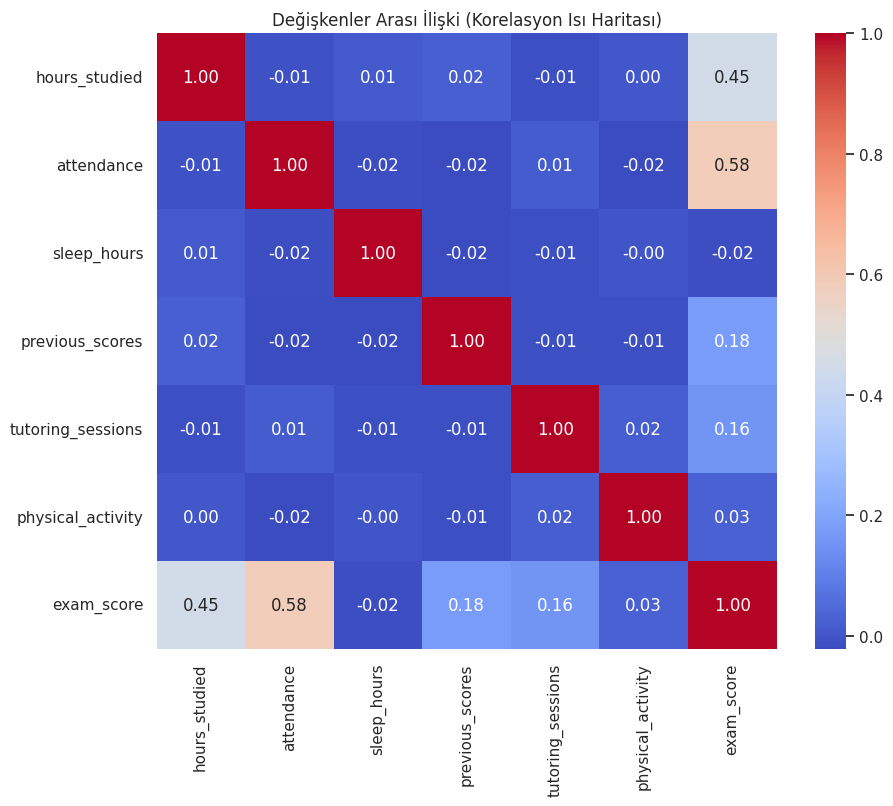

In [ ]:
plt.figure(figsize=(10, 8)) # Çizim boyutunu ayarladık
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Değişkenler Arası İlişki (Korelasyon Isı Haritası)')
plt.show()

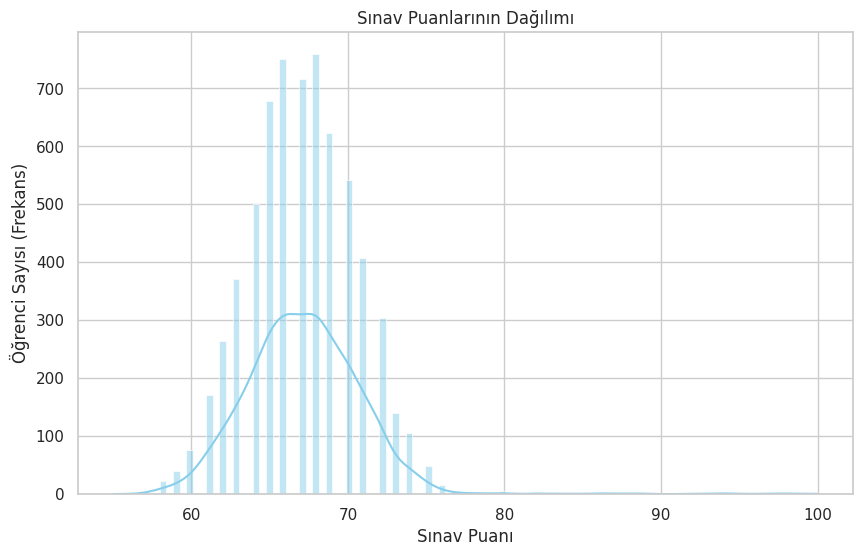

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['exam_score'], kde=True, color='skyblue')
plt.title('Sınav Puanlarının Dağılımı')
plt.xlabel('Sınav Puanı')
plt.ylabel('Öğrenci Sayısı (Frekans)')
plt.show()

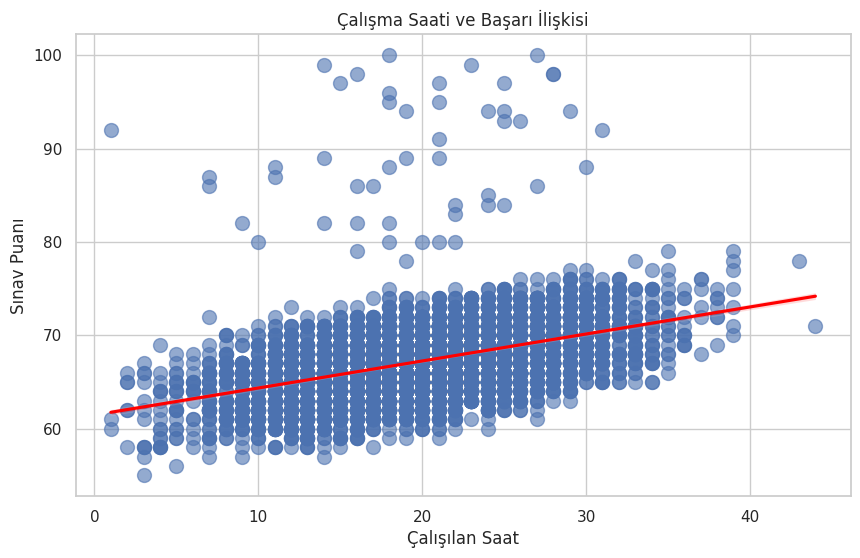

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='hours_studied', y='exam_score', data=df,
            scatter_kws={'alpha':0.6, 's':100}, line_kws={'color':'red'})
plt.title('Çalışma Saati ve Başarı İlişkisi')
plt.xlabel('Çalışılan Saat')
plt.ylabel('Sınav Puanı')
plt.show()

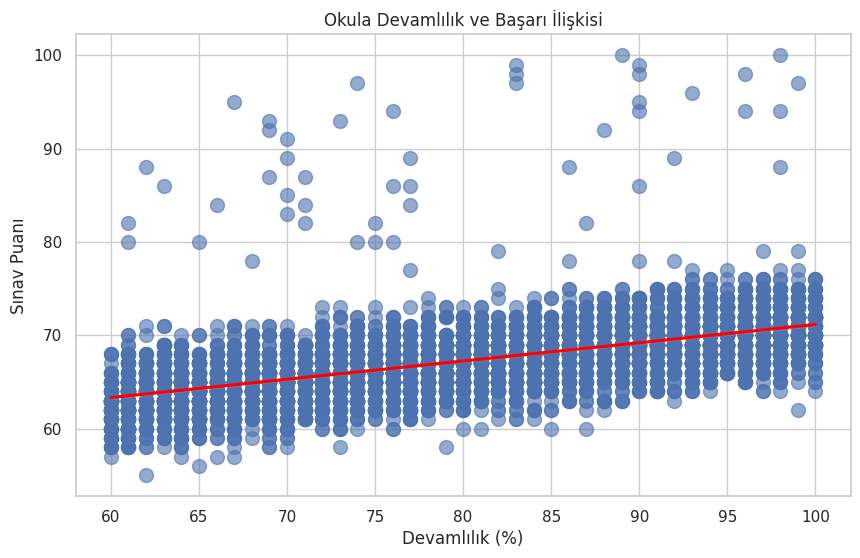

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='attendance', y='exam_score', data=df,
            scatter_kws={'alpha':0.6, 's':100}, line_kws={'color':'red'})
plt.title('Okula Devamlılık ve Başarı İlişkisi')
plt.xlabel('Devamlılık (%)')
plt.ylabel('Sınav Puanı')
plt.show()

/tmp/ipython-input-1036717373.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental_involvement', y='exam_score', data=df,


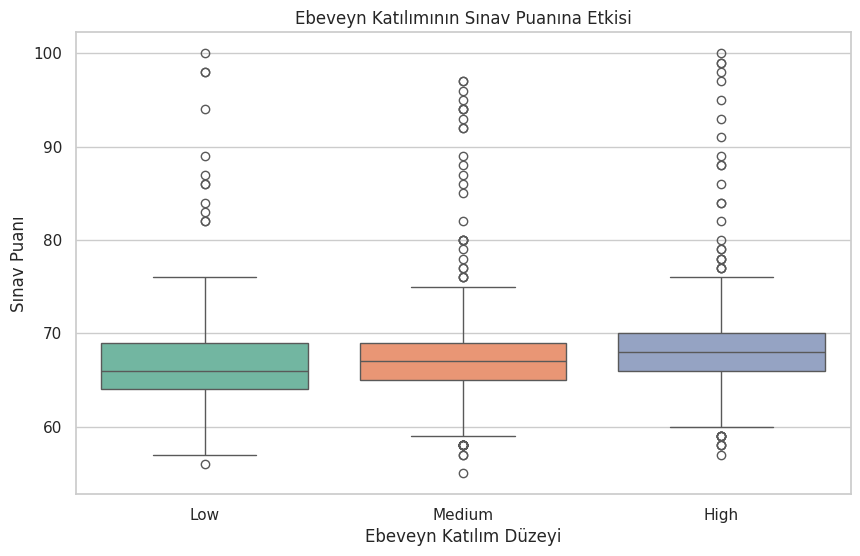

In [ ]:
plt.figure(figsize=(10, 6))
# Sıralamayı doğru yapmak için liste oluşturuyoruz
order_parental = ['Low', 'Medium', 'High']
existing_parental = [x for x in order_parental if x in df['parental_involvement'].unique()]

sns.boxplot(x='parental_involvement', y='exam_score', data=df,
            order=existing_parental, palette='Set2')
plt.title('Ebeveyn Katılımının Sınav Puanına Etkisi')
plt.xlabel('Ebeveyn Katılım Düzeyi')
plt.ylabel('Sınav Puanı')
plt.show()

/tmp/ipython-input-1723766587.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='motivation_level', y='exam_score', data=df,


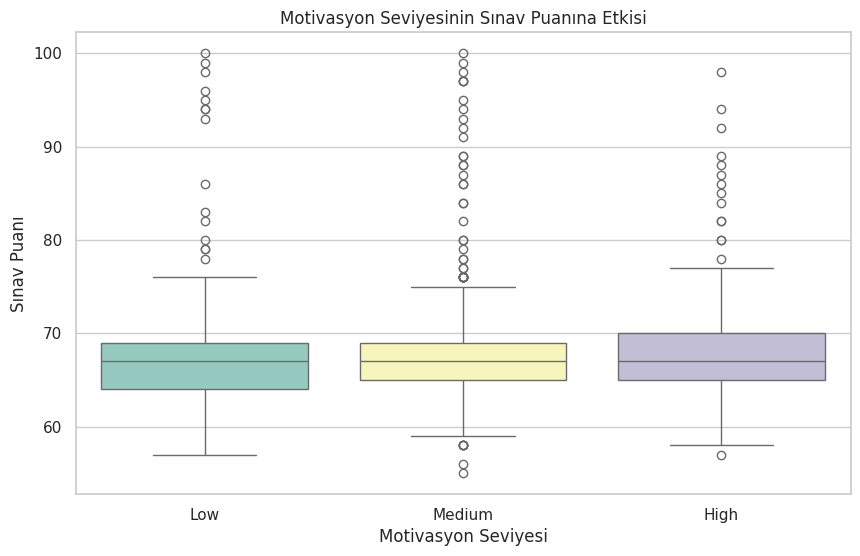

In [ ]:
plt.figure(figsize=(10, 6))
order_motivation = ['Low', 'Medium', 'High']
existing_motivation = [x for x in order_motivation if x in df['motivation_level'].unique()]

sns.boxplot(x='motivation_level', y='exam_score', data=df,
            order=existing_motivation, palette='Set3')
plt.title('Motivasyon Seviyesinin Sınav Puanına Etkisi')
plt.xlabel('Motivasyon Seviyesi')
plt.ylabel('Sınav Puanı')
plt.show()